In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    """
    Class of Perceptron
    """
    def __init__(self,w=np.array([0,0,0,0,0,0,0,0,0]),b=0):
        self.w = w #weight
        self.b = b #bias
    
    def predict(self,x):
        """
        Predict Function
        """
        val = np.dot(x,self.w.T) - self.b
        return list(map(lambda x: 1 if x >=0 else 0,val))

class Genetic_Programming:
    """
    Class of Genetic Programming
    """
    def __init__(self,X,Y,population_size = 1000,copy_rate=0.1,nums_of_candidate=7,cross_over_rate=0.89,mutate_rate=0.01,epochs=10,target_fitness=0.97):
        """
        population_size : size of population
        copy_rate : percentage of copy 
        nums_of_candidate : the number thant randomly chosen from population to copy
        cross_over_rate : percentage of population generated from cross over
        mutate_rate : percentage of population generated from mutateion
        epochs : number of iterations
        target_fitness : if the fitness value reach the raget fitness, terminal the program
        """
        self.X = X
        self.Y = Y
        self.population_size = population_size
        self.copy_rate = copy_rate
        self.nums_of_candidate = nums_of_candidate
        self.cross_over_rate = cross_over_rate
        self.mutate_rate = mutate_rate
        self.epochs = epochs
        self.target_fitness = target_fitness
        
    def generate_population(self):
        """
        Generate Population Perceptron in the first round
        """
        self.population = [Perceptron(np.random.randn(9), np.random.random()) for _ in range(self.population_size)]
        
    def compute_fitness(self,pred):
        """
        Use Accuracy as fitness value
        """
        return np.sum(self.Y==pred)/len(self.Y)

    def cross_over(self):
        """
        Define cross over function. Randomly choose 2 Perceptron, and
        randomly choose a cross over index i. For the child perceptron,
        it uses the [0:i] value of father perceptron and [i:] of mother perceptron
        """
        childs = []
        for i in range(int(self.population_size * self.cross_over_rate)):
            p1,p2 = np.random.choice(self.population,size=2,replace=False) #without replacement
            vector1,vector2 = np.append(p1.w,p1.b),np.append(p2.w,p2.b)
            cross_over_point = np.random.randint(1,9) #randomly choose cross over point
            child = np.append(vector1[0:cross_over_point],vector2[cross_over_point:])
            childs.append(Perceptron(child[0:9],child[9]))
        return childs

    def copy(self):
        """
        Define Copy function. Randomly choose k candidate from population, and copy the 
        one with highest fitnessv value.
        """
        copy_list = []
        for i in range(int(self.population_size * self.copy_rate)):
            index = np.random.choice(range(self.population_size),size=nums_of_candidate,replace=False)
            fitness = [self.compute_fitness(self.population[j].predict(self.X)) for j in index] #compute fitness 
            copy_list.append(self.population[index[fitness.index(max(fitness))]])
        return copy_list
    
    def mutate(self):
        """
        Define Mutate Operator. Choose a small part of poplation, and for each perceptron,
        randomly choose wight wi, let wi = 1 - wi.
        """
        childs = []
        for i in range(int(self.population_size * self.mutate_rate)):
            p = np.random.choice(self.population,size=1)[0]
            vector = np.append(p.w,p.b)
            mutate_index = np.random.randint(0,9)
            vector[mutate_index] = 1 - vector[mutate_index]
            childs.append(Perceptron(vector[0:9],vector[9]))
        return childs
    
    def check_highest_fitness(self):
        """
        Check the fitness value of all the perceptrons in current round.
        Return True if the perceptron with fitness value >= terminated condition else return False.
        """
        fitness = [self.compute_fitness(i.predict(self.X)) for i in self.population] #compute fitness
        if max(fitness) >= self.target_fitness:
            return (True,self.population[fitness.index(max(fitness))],max(fitness))
        else:
            return (False,self.population[fitness.index(max(fitness))],max(fitness))
        
    def evolve(self):
        """
        Main function to perform genetic programming
        """
        self.generate_population() #generate population
        
        counter = 0
        top_fitness = []
        while counter < self.epochs:
            next_generation = self.copy()  #copy
            next_generation.extend(gp.cross_over()) #cross over
            next_generation.extend(gp.mutate()) #mutate
            self.population = next_generation #replace population
            check_result = self.check_highest_fitness() #check the fitness value of current population
            top_fitness.append(check_result[2])
            if check_result[0]: #if meets the terminated condition
                break
            else:
                counter += 1
                
        print('The highest accuray is: ',str(check_result[2]))
    
        #Draw the figure
        plt.figure(figsize=[6,4],dpi=100)
        plt.plot(top_fitness)
        plt.xlabel('Generation Number')
        plt.ylabel('Top Fitness of the population')
        plt.title('Top Fitness of each generation')
        plt.show()
        return check_result[1]

X Shape: (100, 9)
Y Shape: (100,)
The highest accuray is:  0.97


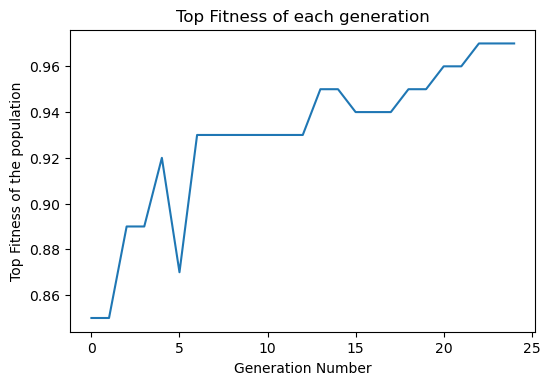

In [4]:
if __name__ == '__main__':
    data = pd.read_csv('assign1-data_python3/gp-training-set.csv',header=None) #read csv
    X,Y = np.array(data.loc[:,0:8]),np.array(data.loc[:,9]).astype(int) #use array to store
    print('X Shape:',X.shape)
    print('Y Shape:',Y.shape)
    
    np.random.seed(1234) #set random seed
    
    #Define Parameters
    population_size = 5000
    copy_rate=0.09
    nums_of_candidate = 10
    cross_over_rate=0.90
    mutate_rate=0.01
    epochs=25
    target_fitness=1
    
    gp = Genetic_Programming(X,Y,population_size,copy_rate,nums_of_candidate,cross_over_rate,mutate_rate,epochs,target_fitness)
    model = gp.evolve()
    
    data.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','Y']
    data['Pred'] = model.predict(X)
    data.to_csv('Q3_prediction.csv')